# Метанпромбанк. Сегментация пользователей по потреблению
Задача - проанализировать клиентов регионального банка и сегментировать пользователей по количеству потребляемых продуктов.   
Цель - снизить отток клиентов.
# Описание данных
Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.   
   
Колонки:
- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

# Материалы
[Презентация](https://disk.yandex.ru/d/vTdMNemrXBeSFg)   
[Дашборд](https://public.tableau.com/app/profile/denis6362/viz/metaprombank/Dashboard1?publish=yes)

## Предобработка данных
На этом этапе посмотрим на данные, проверим на пропуски и дубликаты. При необходимости закодируем не числовые поля и проверим типы данных.

In [4]:
import pandas as pd
import scipy.stats as st

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/bank_dataset.csv')

In [6]:
df.sample(10)

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
6697,15698125,638,Ярославль,М,41,1,131762.94,1,1,1,47675.29,0
1433,15628018,755,Ярославль,М,62,1,127706.33,2,0,1,142377.69,0
2077,15787579,569,Рыбинск,Ж,34,6,144855.34,1,0,0,196555.32,0
2416,15749856,850,Ярославль,М,46,9,117640.39,1,1,0,88920.68,0
4219,15856240,543,Ростов Великий,Ж,25,1,146566.01,1,0,1,161407.48,0
8674,15762162,529,Ярославль,М,67,8,103101.56,2,1,1,154002.02,1
9066,15768245,662,Ростов Великий,М,30,5,115286.68,2,1,1,149587.92,0
2261,15724138,763,Ростов Великий,Ж,61,1,66101.89,1,1,1,143981.27,0
5351,15721784,558,Ростов Великий,М,41,2,124227.14,1,1,1,111184.67,0
3935,15691098,728,Ростов Великий,М,45,3,108924.33,2,1,0,84300.40,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [8]:
df.describe()

,userid,score,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.573368e+07,650.528800,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.560844e+07,350.000000,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.567126e+07,584.000000,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.573347e+07,652.000000,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.579597e+07,718.000000,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.585843e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Проверка данных на пропуски и дубликаты

In [9]:
df.isna().mean()

userid              0.0000
score               0.0000
City                0.0000
Gender              0.0000
Age                 0.0000
Objects             0.0000
Balance             0.3617
Products            0.0000
CreditCard          0.0000
Loyalty             0.0000
estimated_salary    0.0000
Churn               0.0000
dtype: float64

В столбце Balance 36% пропусков.   
Посомтрим на распределение пропусков по признакам.

<AxesSubplot:xlabel='Age'>

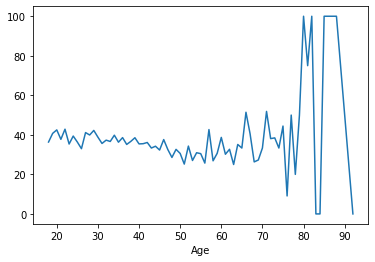

In [10]:
(100 * df[df.Balance.isna()].groupby('Age').userid.count() / df.groupby('Age').userid.count()).fillna(0).plot()

score


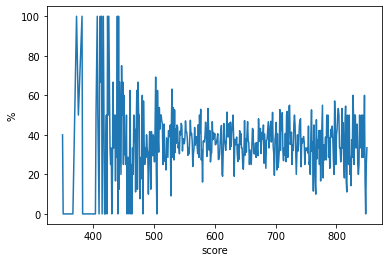

--------------------
City


City
Ростов Великий      NaN
Рыбинск           48.41
Ярославль         48.22
Name: userid, dtype: float64

--------------------
Gender


Gender
Ж    36.41
М    35.97
Name: userid, dtype: float64

--------------------
Age


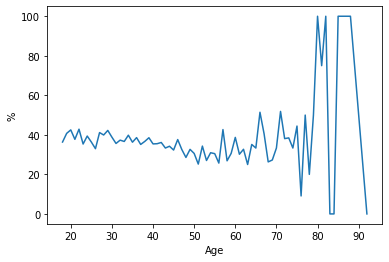

--------------------
Objects


Objects
0     33.17
1     33.72
2     36.45
3     34.89
4     37.31
5     36.96
6     37.95
7     37.55
8     35.41
9     36.59
10    36.33
Name: userid, dtype: float64

--------------------
Products


Products
1    17.80
2    56.64
3    36.84
4    23.33
Name: userid, dtype: float64

--------------------
CreditCard


CreditCard
0    34.80
1    36.74
Name: userid, dtype: float64

--------------------
Loyalty


Loyalty
0    35.97
1    36.36
Name: userid, dtype: float64

--------------------
Churn


Churn
0    39.14
1    24.55
Name: userid, dtype: float64

--------------------


In [11]:
for col in df.drop(columns=['userid', 'Balance', 'estimated_salary']).columns:
    print(col)
    if col in ['score', 'Age']:
        (100 * df[df.Balance.isna()].groupby(col).userid.count() / df.groupby(col).userid.count()).fillna(0).plot()
        plt.ylabel('%')
        plt.show()
    else:
        display(round(100* df[df.Balance.isna()].groupby(col)['userid'].count() / df.groupby(col)['userid'].count(), 2))
    print(20*'-')

Пустые значения Balance распредлеленые по всем признакам. Возомжно технический сбой при выгрузке, а возможно баг в самой базе. Стоит обратиться к разработчикам и выяснить причину.

Будем считать пустые значения - 0-вым балансом и заполним пропуски 0-мя.

In [12]:
df.Balance.fillna(0, inplace=True)

In [13]:
df.duplicated().sum()

0

Дубликатов нет.

### Кодирование переменных

Закодируем категориальные переменные Gender и City.   
City закодируем унитарным кодированием (One Hot Encoding).

In [14]:
df_c = pd.get_dummies(df, columns=['City'])

In [15]:
df_c.columns

Index(['userid', 'score', 'Gender', 'Age', 'Objects', 'Balance', 'Products',
       'CreditCard', 'Loyalty', 'estimated_salary', 'Churn',
       'City_Ростов Великий', 'City_Рыбинск', 'City_Ярославль'],
      dtype='object')

Переименуем столбец City_Ростов Великий в City_Ростов_Великий.

In [16]:
df_c.rename(columns={'City_Ростов Великий': 'City_Ростов_Великий'}, inplace=True)

In [17]:
df_c.Gender.unique()

array(['Ж', 'М'], dtype=object)

В Gender заменим М на 0, Ж на 1.

In [18]:
df_c.replace({'М': 0, 'Ж': 1}, inplace=True)

In [19]:
df_c.sample(10)

,userid,score,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn,City_Ростов_Великий,City_Рыбинск,City_Ярославль
9835,15658908,838,0,31,2,0.00,2,1,0,8222.96,0,0,0,1
6928,15847589,781,1,48,0,57098.96,1,1,0,85644.06,1,0,0,1
3000,15627281,532,1,40,5,0.00,2,0,1,177099.71,0,0,0,1
3066,15832551,503,1,28,5,0.00,2,1,0,125918.17,0,0,0,1
6987,15619906,532,0,60,5,76705.87,2,0,1,13889.73,0,0,0,1
4109,15850504,702,0,28,1,103033.83,1,1,1,40321.87,0,1,0,0
7312,15731000,629,1,43,0,0.00,2,1,1,41263.69,0,0,0,1
612,15662593,605,1,64,2,129555.70,1,1,1,13601.79,0,0,0,1
9622,15661486,590,0,31,8,112211.61,1,1,0,26261.42,0,0,0,1
426,15695619,492,0,39,10,124576.65,2,1,0,148584.61,0,1,0,0


### Проверка типов данных

In [20]:
df_c.dtypes

userid                   int64
score                    int64
Gender                   int64
Age                      int64
Objects                  int64
Balance                float64
Products                 int64
CreditCard               int64
Loyalty                  int64
estimated_salary       float64
Churn                    int64
City_Ростов_Великий      uint8
City_Рыбинск             uint8
City_Ярославль           uint8
dtype: object

Типы данных определены верно.

## Анализ данных
На этом этапе проведем исследовательский анализ данных: посмотрим на распределение признаков, сделаем первые выводы.

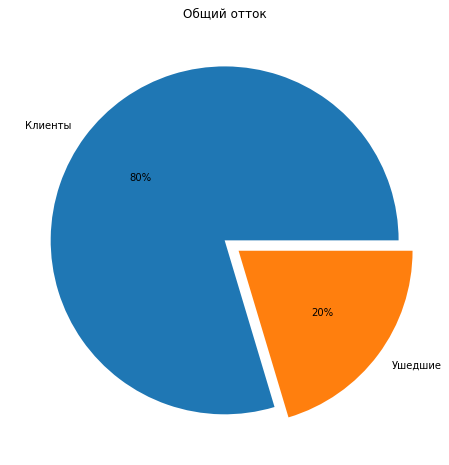

In [21]:
plt.figure(figsize=(8,8))
plt.pie(df.groupby('Churn').userid.count(), labels=['Клиенты', 'Ушедшие'], autopct='%.0f%%', explode=[0, 0.1])
plt.title('Общий отток')
plt.show()

Отток клиентов - 20%.

### Распределение признаков

In [22]:
binary_cols= [col for col in df_c.columns if len(df_c[col].unique())==2]
binary_cols

['Gender',
 'CreditCard',
 'Loyalty',
 'Churn',
 'City_Ростов_Великий',
 'City_Рыбинск',
 'City_Ярославль']

In [23]:
sns.set_theme(style="whitegrid")

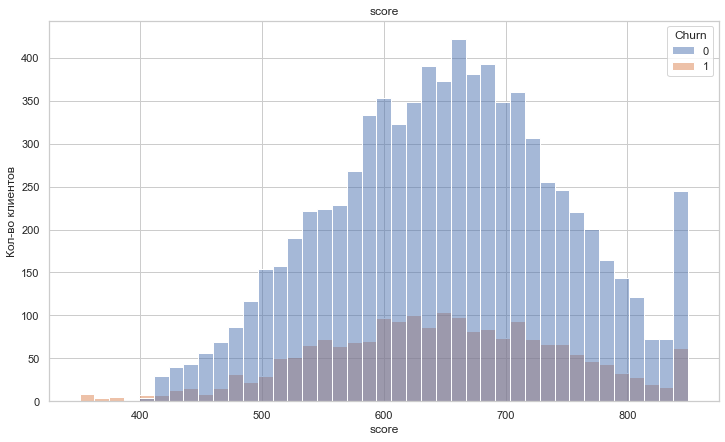

----------------------------------------------------------------------------------------------------


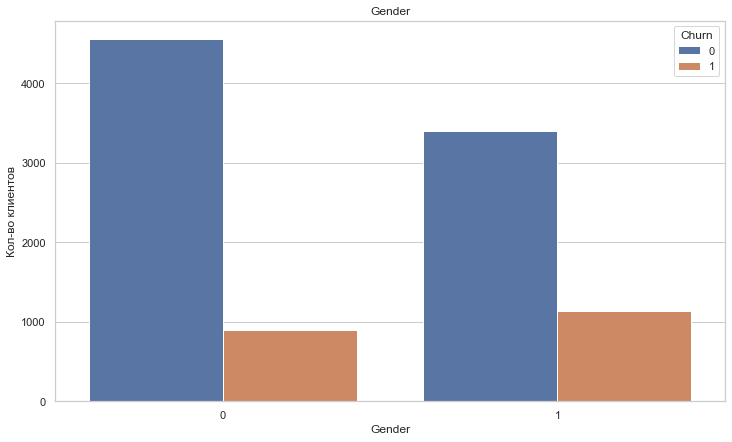

----------------------------------------------------------------------------------------------------


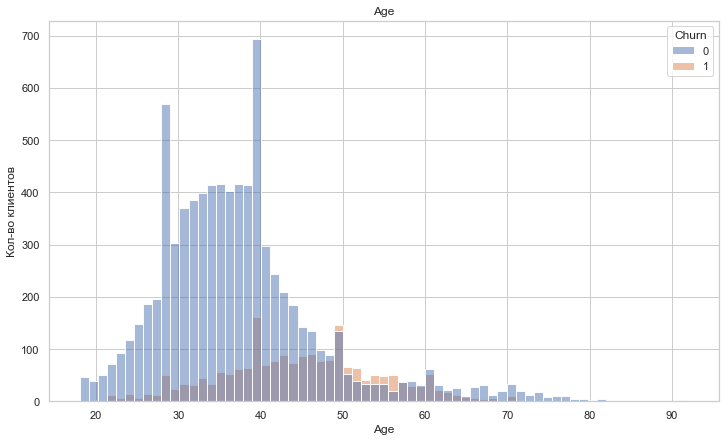

----------------------------------------------------------------------------------------------------


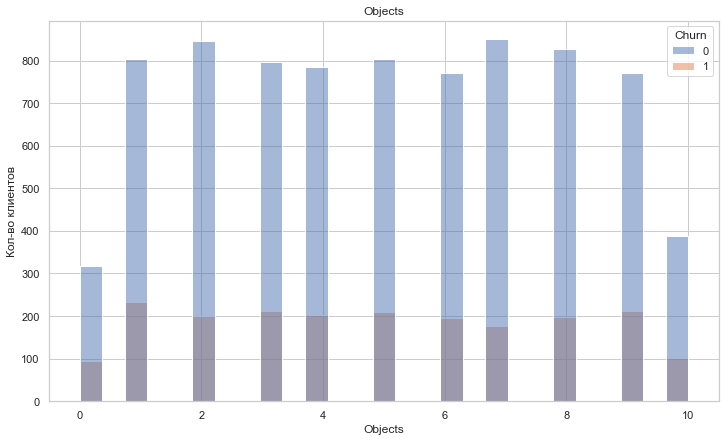

----------------------------------------------------------------------------------------------------


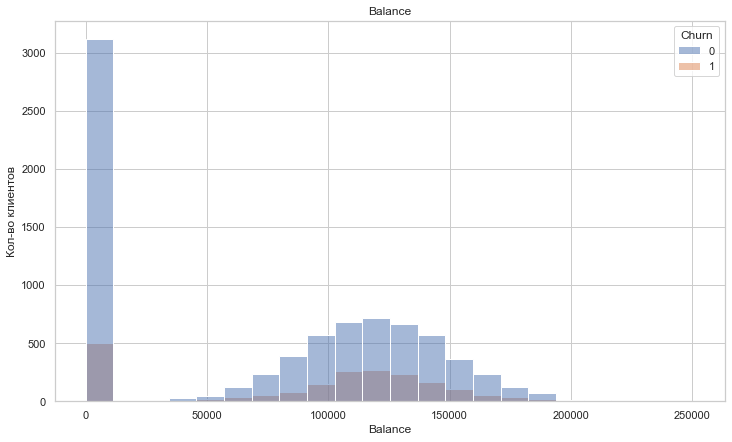

----------------------------------------------------------------------------------------------------


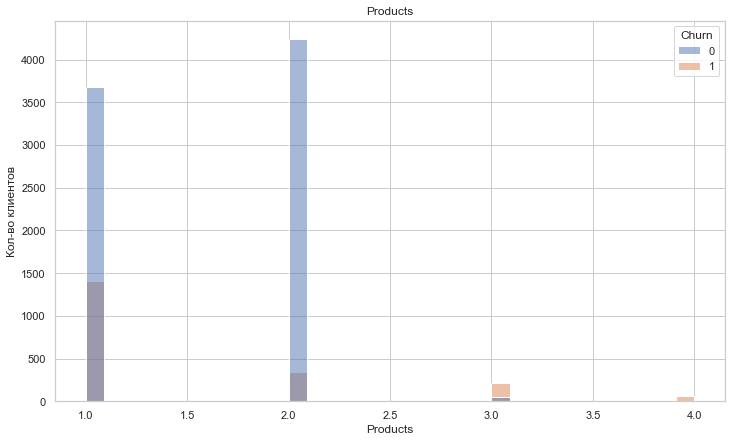

----------------------------------------------------------------------------------------------------


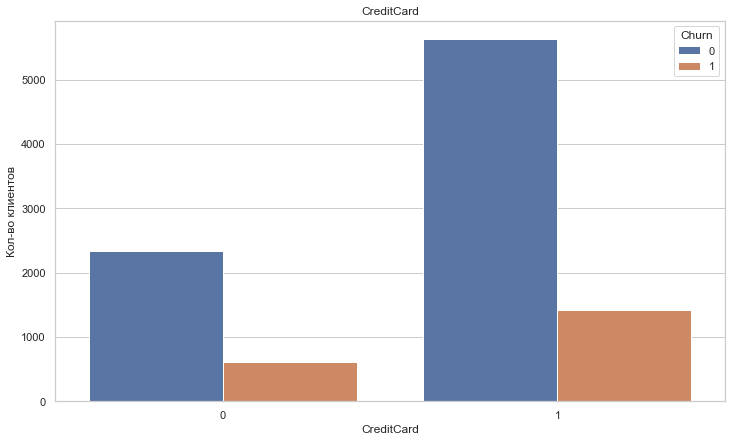

----------------------------------------------------------------------------------------------------


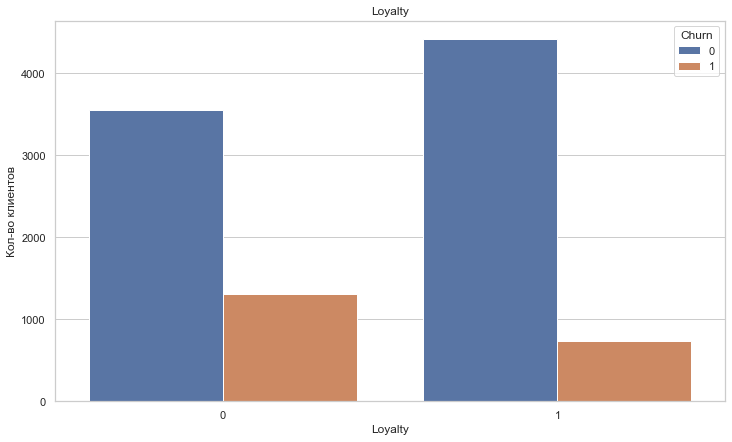

----------------------------------------------------------------------------------------------------


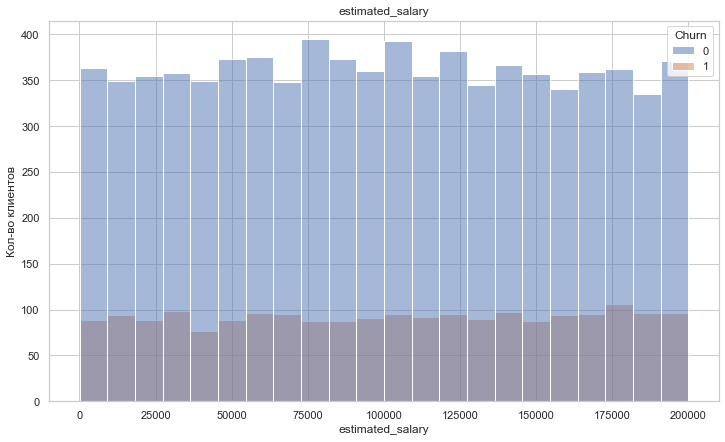

----------------------------------------------------------------------------------------------------


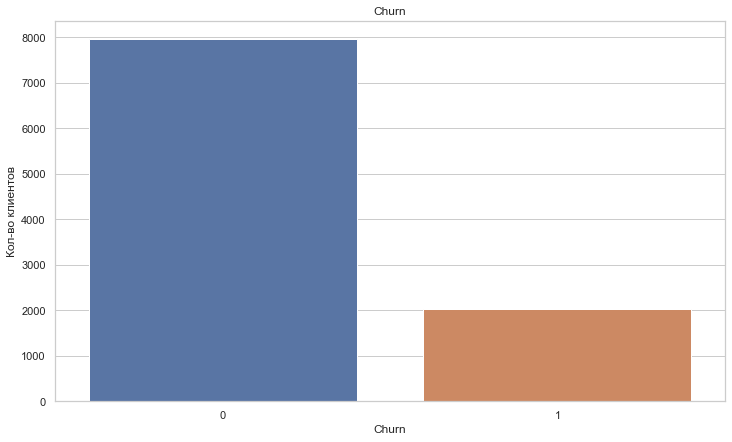

----------------------------------------------------------------------------------------------------


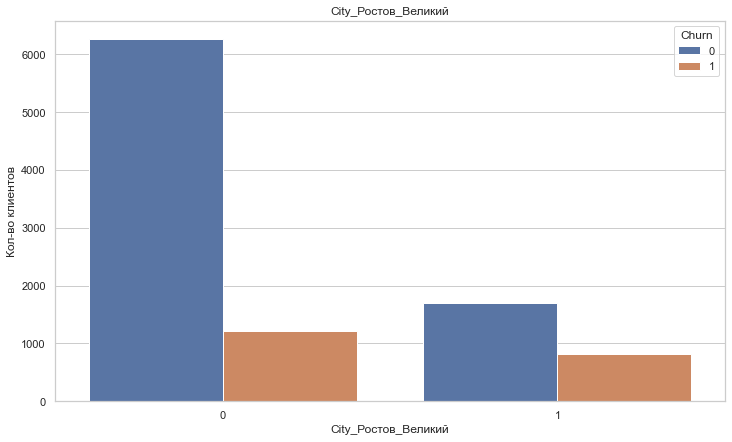

----------------------------------------------------------------------------------------------------


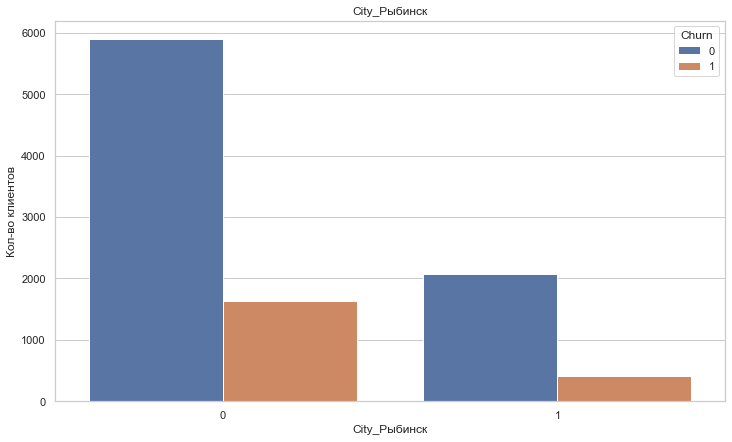

----------------------------------------------------------------------------------------------------


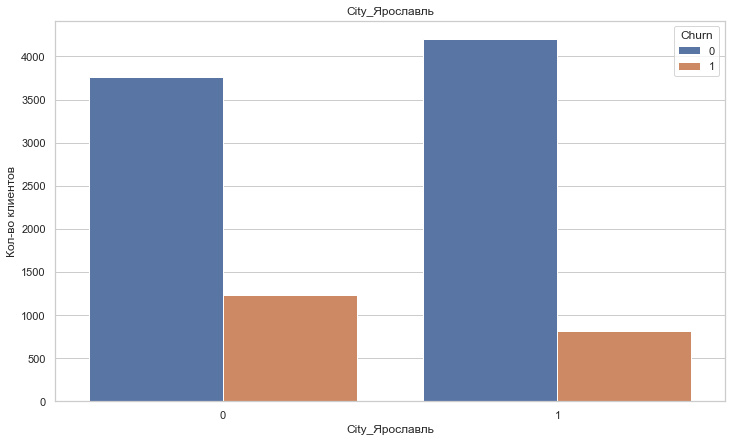

----------------------------------------------------------------------------------------------------


In [24]:
for col in df_c.drop(columns='userid').columns:
    if col in binary_cols:
        plt.figure(figsize=(12,7))
        if col != 'Churn':
            sns.barplot(data = df_c.groupby([col, 'Churn']).userid.count().reset_index(), x=col, y='userid', hue='Churn')
        else: sns.barplot(data = df_c.groupby([col]).userid.count().reset_index(), x=col, y='userid')
    else:
        plt.figure(figsize=(12,7))
        sns.histplot(data = df_c, x = col, hue = 'Churn')
    plt.title(col)
    plt.ylabel('Кол-во клиентов')
    plt.show()
    print(100*'-')

In [25]:
df_c.score.quantile(.95)

812.0

In [26]:
df_c.query('Balance == 0').userid.count() / df_c.userid.count()

0.3617

In [27]:
df_c.query('Balance == 0 and Churn == 1').userid.count() / df_c.query('Balance == 0').userid.count()

0.13823610727121924

In [28]:
df_c.CreditCard.sum() / df_c.CreditCard.count()

0.7055

5% клиентов имеют очень высоки рейтинг, 812 и более (макс. 850).   
И мужчины и женщины распределены примерно одинаково.   
В основном возраст клиентов от 30 до 45 лет.   
Клиенты с 1-9 объектами недвижимости распределены примерно одинаково, клиентов с 0 и 10 объектами меньше.   
У 36% клиентов на балансе 0. Из них только 13% ушли из банка.
Большая часть клиентов пользуется 1 или 2 продуктами.
70% клиентов пользу.тся кредитной картой.
Активность клиентов и зарплата распеределены равномерно.
Половина клиентов из Ярославля. Из Ростова Великого и Рыбинска по ~25% клиентов.

### Корреляция признаков

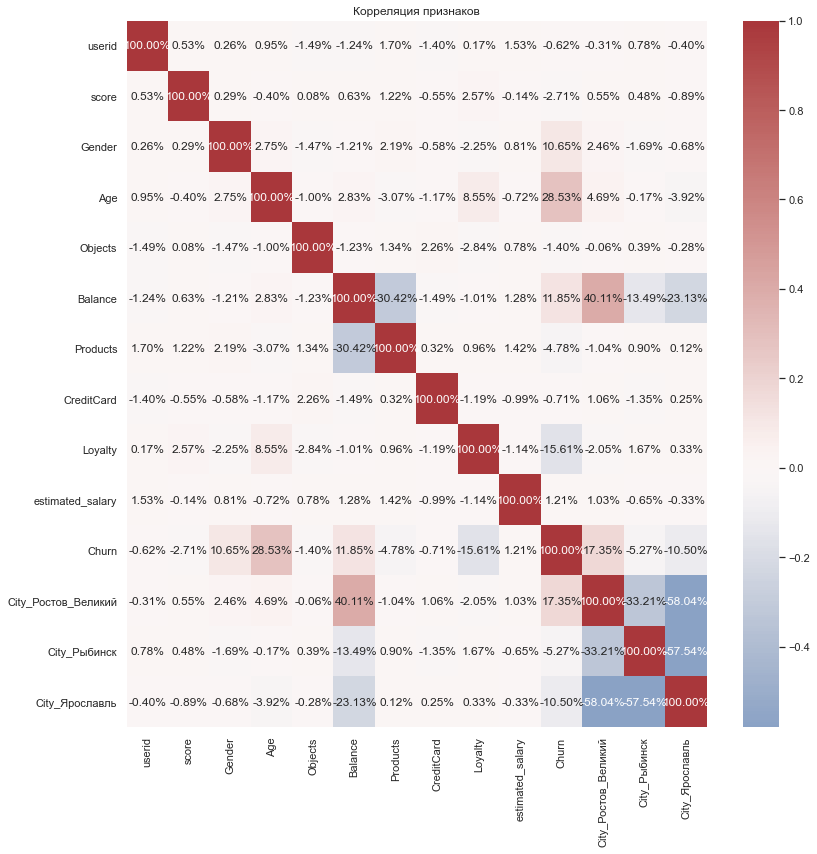

In [29]:
plt.figure(figsize=(13,13))
sns.heatmap(df_c.corr(), annot=True, fmt='.2%', center=0, cmap='vlag')
plt.title('Корреляция признаков')
plt.show()

Сильной корреляции между признаками не наблюдается.

## Сегмантация пользователей
На этом этапе проведем сегментацию пользователей по количеству потребляемых продуктов.

In [30]:
df_c.Products.value_counts()

1    5084
2    4590
3     266
4      60
Name: Products, dtype: int64

In [31]:
df_c.groupby('Products').mean().T

Products,1,2,3,4
userid,1.573237e+07,1.573484e+07,1.574182e+07,1.571936e+07
score,6.491210e+02,6.521887e+02,6.481053e+02,6.535833e+02
Gender,4.516129e-01,4.488017e-01,5.601504e-01,6.333333e-01
Age,3.967309e+01,3.775359e+01,4.319549e+01,4.568333e+01
Objects,4.974626e+00,5.051852e+00,5.003759e+00,5.300000e+00
Balance,9.855187e+04,5.187915e+04,7.545833e+04,9.373314e+04
CreditCard,7.037766e-01,7.071895e-01,7.142857e-01,6.833333e-01
Loyalty,5.041306e-01,5.328976e-01,4.248120e-01,4.833333e-01
estimated_salary,9.948726e+04,1.004520e+05,1.043181e+05,1.047637e+05
Churn,2.771440e-01,7.581699e-02,8.270677e-01,1.000000e+00


In [32]:
df_c.groupby('Products').Churn.mean()

Products
1    0.277144
2    0.075817
3    0.827068
4    1.000000
Name: Churn, dtype: float64

score


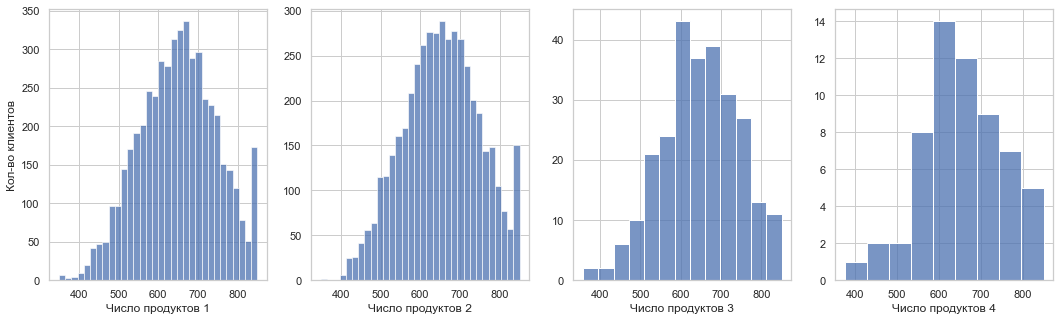

,var,Число пр-в 1,2,3,4
0,count,5084.000000,4590.000000,266.000000,60.000000
1,mean,649.120968,652.188671,648.105263,653.583333
2,std,97.203710,96.066831,95.190396,101.265600
3,min,350.000000,350.000000,358.000000,376.000000
4,25%,581.000000,586.000000,586.000000,595.000000
5,50%,651.000000,653.000000,650.000000,643.000000
6,75%,717.000000,719.000000,711.000000,708.000000
7,max,850.000000,850.000000,850.000000,850.000000


------------------------------------------------------------------------------------------------------------------------
Gender


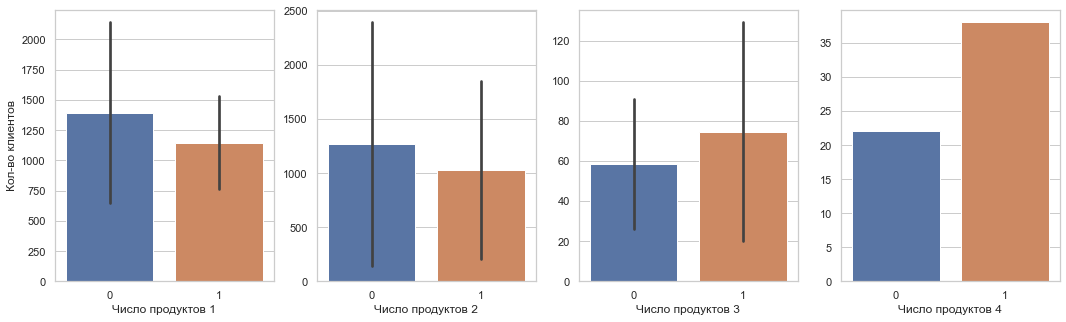

,var,Число пр-в 1,2,3,4
0,count,5084.000000,4590.000000,266.000000,60.000000
1,mean,0.451613,0.448802,0.560150,0.633333
2,std,0.497702,0.497426,0.497304,0.485961
3,min,0.000000,0.000000,0.000000,0.000000
4,25%,0.000000,0.000000,0.000000,0.000000
5,50%,0.000000,0.000000,1.000000,1.000000
6,75%,1.000000,1.000000,1.000000,1.000000
7,max,1.000000,1.000000,1.000000,1.000000


------------------------------------------------------------------------------------------------------------------------
Age


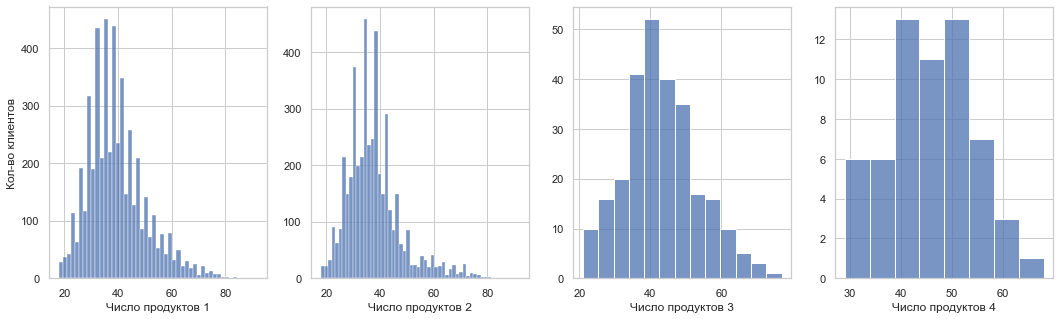

,var,Число пр-в 1,2,3,4
0,count,5084.000000,4590.000000,266.000000,60.000000
1,mean,39.673092,37.753595,43.195489,45.683333
2,std,10.659566,10.145663,10.422008,8.619040
3,min,18.000000,18.000000,21.000000,29.000000
4,25%,32.000000,31.000000,36.000000,40.000000
5,50%,38.000000,36.000000,42.000000,45.000000
6,75%,45.000000,42.000000,50.000000,50.250000
7,max,92.000000,92.000000,77.000000,68.000000


------------------------------------------------------------------------------------------------------------------------
Objects


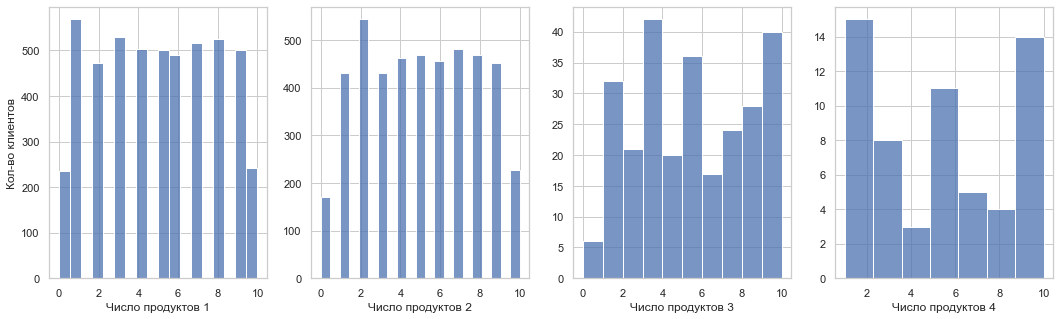

,var,Число пр-в 1,2,3,4
0,count,5084.000000,4590.000000,266.000000,60.000000
1,mean,4.974626,5.051852,5.003759,5.300000
2,std,2.914269,2.867741,2.879332,2.947564
3,min,0.000000,0.000000,0.000000,1.000000
4,25%,2.000000,3.000000,3.000000,2.750000
5,50%,5.000000,5.000000,5.000000,5.000000
6,75%,7.000000,7.000000,8.000000,8.000000
7,max,10.000000,10.000000,10.000000,10.000000


------------------------------------------------------------------------------------------------------------------------
Balance


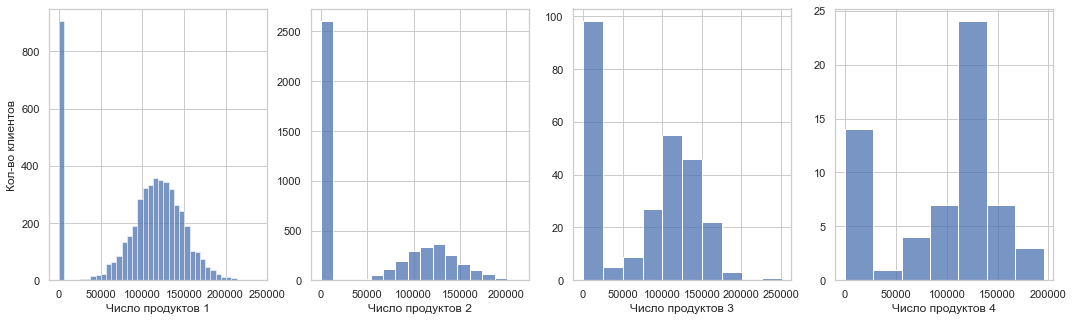

,var,Число пр-в 1,2,3,4
0,count,5084.000000,4590.000000,266.000000,60.00000
1,mean,98551.870614,51879.145813,75458.328195,93733.13500
2,std,53234.092790,62644.474506,62924.623833,57507.38375
3,min,0.000000,0.000000,0.000000,0.00000
4,25%,79700.722500,0.000000,0.000000,65787.32000
5,50%,111886.035000,0.000000,95973.935000,116808.19500
6,75%,134596.312500,113593.457500,127522.350000,131589.51250
7,max,238387.560000,214346.960000,250898.090000,195238.29000


------------------------------------------------------------------------------------------------------------------------
CreditCard


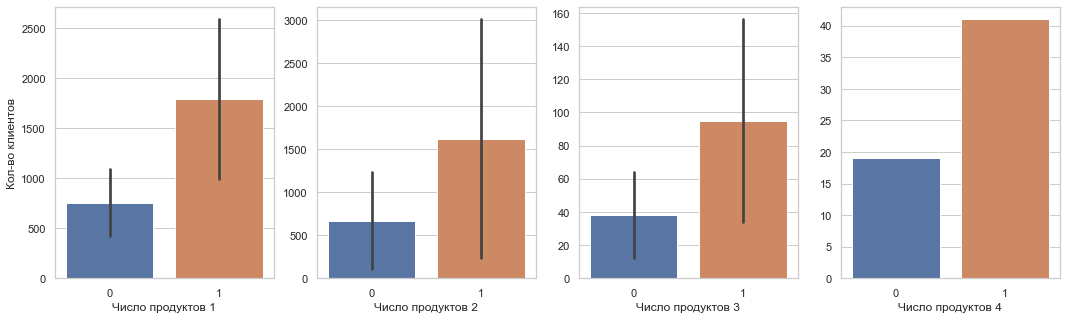

,var,Число пр-в 1,2,3,4
0,count,5084.000000,4590.000000,266.000000,60.000000
1,mean,0.703777,0.707190,0.714286,0.683333
2,std,0.456636,0.455102,0.452606,0.469102
3,min,0.000000,0.000000,0.000000,0.000000
4,25%,0.000000,0.000000,0.000000,0.000000
5,50%,1.000000,1.000000,1.000000,1.000000
6,75%,1.000000,1.000000,1.000000,1.000000
7,max,1.000000,1.000000,1.000000,1.000000


------------------------------------------------------------------------------------------------------------------------
Loyalty


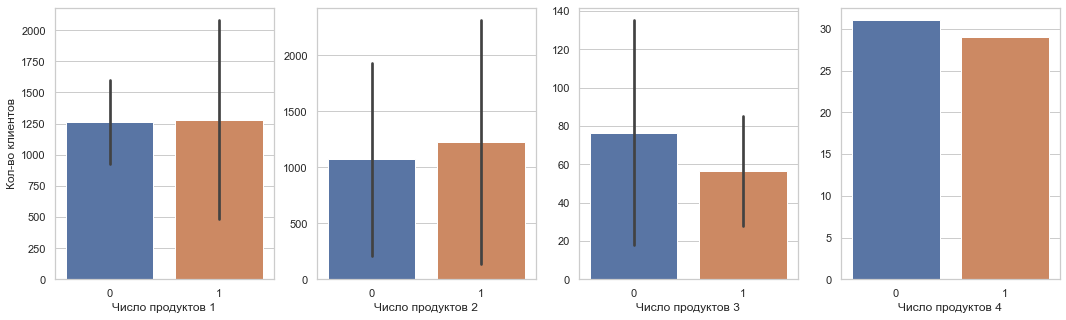

,var,Число пр-в 1,2,3,4
0,count,5084.000000,4590.000000,266.000000,60.000000
1,mean,0.504131,0.532898,0.424812,0.483333
2,std,0.500032,0.498971,0.495246,0.503939
3,min,0.000000,0.000000,0.000000,0.000000
4,25%,0.000000,0.000000,0.000000,0.000000
5,50%,1.000000,1.000000,0.000000,0.000000
6,75%,1.000000,1.000000,1.000000,1.000000
7,max,1.000000,1.000000,1.000000,1.000000


------------------------------------------------------------------------------------------------------------------------
estimated_salary


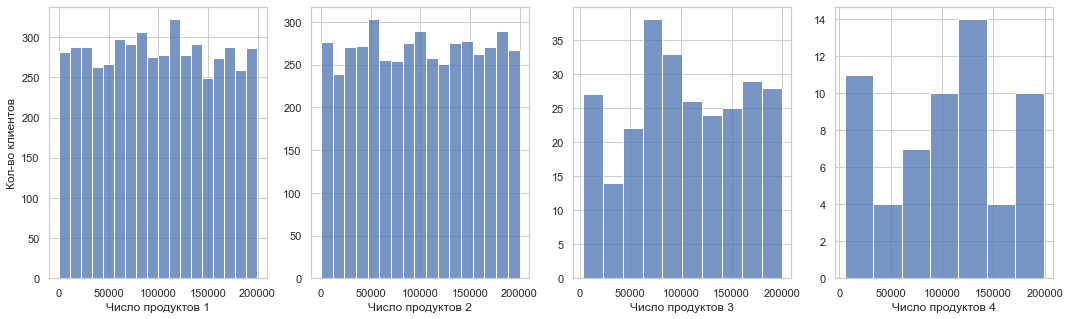

,var,Число пр-в 1,2,3,4
0,count,5084.000000,4590.000000,266.000000,60.000000
1,mean,99487.256851,100452.012821,104318.130564,104763.723333
2,std,57363.626412,57790.799984,55464.281426,57526.494114
3,min,11.580000,90.070000,3440.470000,5669.310000
4,25%,50414.515000,50797.287500,64344.800000,62033.390000
5,50%,99226.830000,100738.855000,101046.885000,112163.105000
6,75%,148212.695000,150151.460000,152230.195000,139371.955000
7,max,199970.740000,199992.480000,199357.240000,198874.520000


------------------------------------------------------------------------------------------------------------------------
Churn


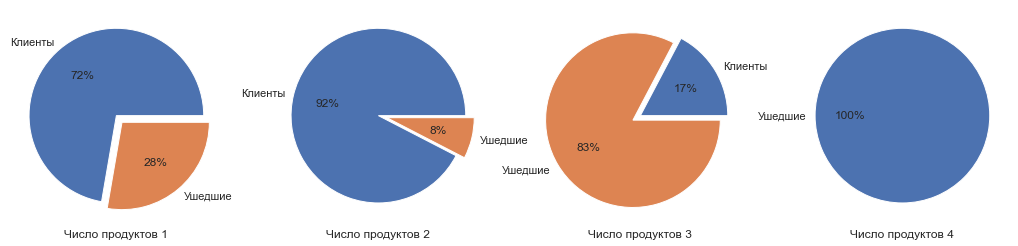

,var,Число пр-в 1,2,3,4
0,count,5084.000000,4590.000000,266.000000,60.0
1,mean,0.277144,0.075817,0.827068,1.0
2,std,0.447632,0.264734,0.378902,0.0
3,min,0.000000,0.000000,0.000000,1.0
4,25%,0.000000,0.000000,1.000000,1.0
5,50%,0.000000,0.000000,1.000000,1.0
6,75%,1.000000,0.000000,1.000000,1.0
7,max,1.000000,1.000000,1.000000,1.0


------------------------------------------------------------------------------------------------------------------------
City_Ростов_Великий


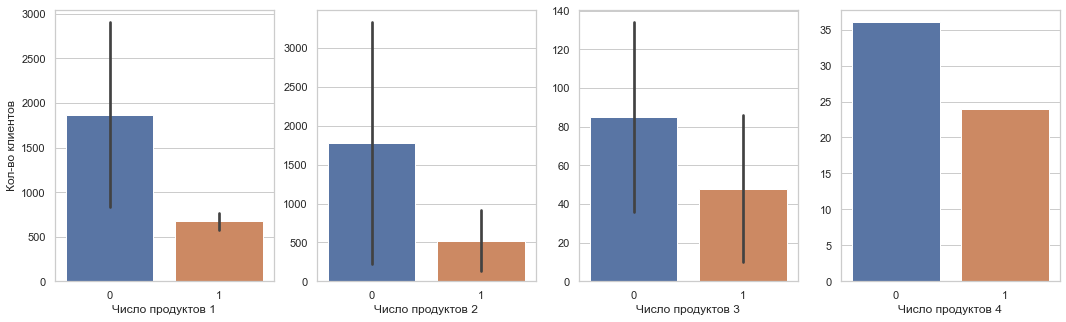

,var,Число пр-в 1,2,3,4
0,count,5084.000000,4590.000000,266.000000,60.000000
1,mean,0.265342,0.226580,0.360902,0.400000
2,std,0.441559,0.418664,0.481168,0.494032
3,min,0.000000,0.000000,0.000000,0.000000
4,25%,0.000000,0.000000,0.000000,0.000000
5,50%,0.000000,0.000000,0.000000,0.000000
6,75%,1.000000,0.000000,1.000000,1.000000
7,max,1.000000,1.000000,1.000000,1.000000


------------------------------------------------------------------------------------------------------------------------
City_Рыбинск


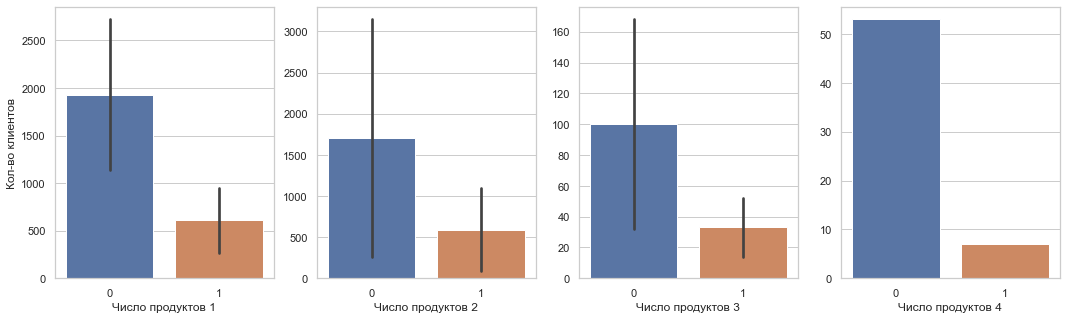

,var,Число пр-в 1,2,3,4
0,count,5084.000000,4590.000000,266.000000,60.000000
1,mean,0.240165,0.257734,0.248120,0.116667
2,std,0.427226,0.437435,0.432736,0.323732
3,min,0.000000,0.000000,0.000000,0.000000
4,25%,0.000000,0.000000,0.000000,0.000000
5,50%,0.000000,0.000000,0.000000,0.000000
6,75%,0.000000,1.000000,0.000000,0.000000
7,max,1.000000,1.000000,1.000000,1.000000


------------------------------------------------------------------------------------------------------------------------
City_Ярославль


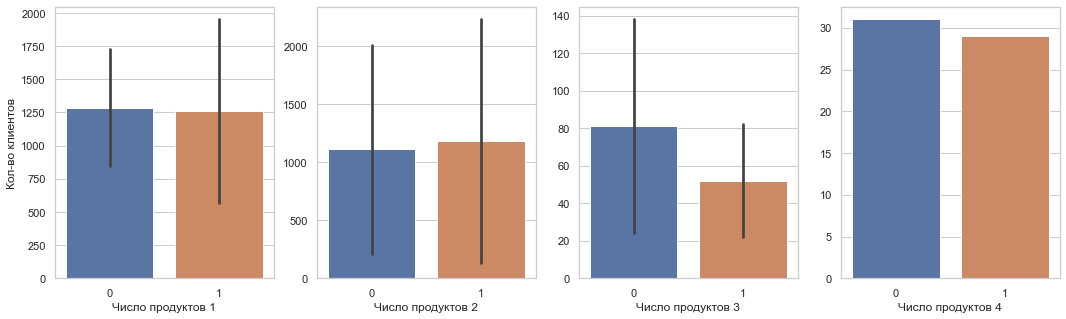

,var,Число пр-в 1,2,3,4
0,count,5084.000000,4590.000000,266.000000,60.000000
1,mean,0.494493,0.515686,0.390977,0.483333
2,std,0.500019,0.499808,0.488889,0.503939
3,min,0.000000,0.000000,0.000000,0.000000
4,25%,0.000000,0.000000,0.000000,0.000000
5,50%,0.000000,1.000000,0.000000,0.000000
6,75%,1.000000,1.000000,1.000000,1.000000
7,max,1.000000,1.000000,1.000000,1.000000


------------------------------------------------------------------------------------------------------------------------


In [33]:
for col in df_c.drop(columns=['userid', 'Products']).columns:
    desc_df = pd.DataFrame()
    plt.figure(figsize=[18, 5])
    print(col)
    tt = True
    for gr in df_c.Products.sort_values().unique():
        desc_df = (df_c.query('Products == @gr')[col].describe().reset_index().rename(columns={'index': 'var', col: f'Число пр-в {gr}'}) 
                   if desc_df.empty else 
                   desc_df.merge(df_c.query('Products == @gr')[col].describe().reset_index().rename(columns={'index': 'var', col: gr}), on='var'))
        plt.subplot(1, 4, gr)
        if col in binary_cols:
            if col != 'Churn':
                sns.barplot(data = df_c.query('Products == @gr').groupby([col, 'Churn']).userid.count().reset_index(), x=col, y='userid')
            else:
                try: plt.pie(df_c.query('Products == @gr').groupby(col).userid.count(), labels=['Клиенты', 'Ушедшие'], autopct='%.0f%%', explode=[0, 0.1])
                except: plt.pie(df_c.query('Products == @gr').groupby(col).userid.count(), labels=['Ушедшие'], autopct='%.0f%%')
        else:
            sns.histplot(data = df_c.query('Products == @gr'), x = col)
        plt.xlabel(f'Число продуктов {gr}')
        if tt and col != 'Churn': 
            plt.ylabel('Кол-во клиентов')
            tt = False
        else: plt.ylabel('')
    plt.show()
    display(desc_df)
    print(120*'-')

Взглянем на среднее призанков в разрезе полученных сегментов.

In [34]:
round(df_c.groupby('Products').agg(['mean', 'median']).T, 2)

Products                              1            2            3            4
userid              mean    15732367.90  15734841.49  15741816.49  15719361.27
                    median  15732061.00  15735775.50  15744380.50  15707754.50
score               mean         649.12       652.19       648.11       653.58
                    median       651.00       653.00       650.00       643.00
Gender              mean           0.45         0.45         0.56         0.63
                    median         0.00         0.00         1.00         1.00
Age                 mean          39.67        37.75        43.20        45.68
                    median        38.00        36.00        42.00        45.00
Objects             mean           4.97         5.05         5.00         5.30
                    median         5.00         5.00         5.00         5.00
Balance             mean       98551.87     51879.15     75458.33     93733.14
                    median    111886.04         0.00     95973.94    116808.20
CreditCard          mean           0.70         0.71         0.71         0.68
                    median         1.00         1.00         1.00         1.00
Loyalty             mean           0.50         0.53         0.42         0.48
                    median         1.00         1.00         0.00         0.00
estimated_salary    mean       99487.26    100452.01    104318.13    104763.72
                    median     99226.83    100738.86    101046.88    112163.11
Churn               mean           0.28         0.08         0.83         1.00
                    median         0.00         0.00         1.00         1.00
City_Ростов_Великий mean           0.27         0.23         0.36         0.40
                    median         0.00         0.00         0.00         0.00
City_Рыбинск        mean           0.24         0.26         0.25         0.12
                    median         0.00         0.00         0.00         0.00
City_Ярославль      mean           0.49         0.52         0.39         0.48
                    median         0.00         1.00         0.00         0.00

Сегменты 1 и 2 схожи, за исключением % оттока.   
Меньше всего отток в сегменте с 2 продуктами. Отток клиентов с 3 продуктами - 82.7%, а с 4 - 100%.
Основная часть клиентов, использующих 1-2 продукта, до 40 лет. 3-4 продукта - старше 40.   
Среди клиентов с 1-2 продуктами преобладают мужчины, а с 3-4 продуктам женщины.   
Во всех сегментах большое число клиентов с пустым балансом.   
Во всех сегментах клиентов с кредитной картой примерно в 2 раза больше.   
Среди клиентов с 1-2 продуктами преобладают активные.    

Признак \ Сегмент | 1 | 2 | 3 | 4
--- | --- | --- | --- | ---
Cредний рейтинг | 649.12 | 652.19 | 648.11 | 653.58
Средний возраст (медиана) | 38 | 36 | 42 | 45
Преобладающий пол | Мужчины (45%) | Мужчины (45%) | Женщины (56%) | Женщины (63%)
Объекты недвижимости (медиана) | 5 | 5 | 5 | 5
Средний статок на счету | 98551.87 | 51879.15 | 75458.33 | 93733.14
Используют кредитную карту | 70% | 71% | 71% | 68%
Активных клиентов (> 5 операций за месяц) | 50% | 53% | 42% | 48%
Клиенты из Ярославля | 49% | 52% | 39% | 48%
Клиенты из Рыбинска | 24% | 26% | 25% | 12%
Клиенты из Ростова Великого | 27% | 23% | 36% | 40%
Отток | 28% | 8% | 83% | 100%


## Проверка гипотез
На этом этапе проверим статистические гипотезы.

In [35]:
alpha = .05

### Гипотеза 1: доходы между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, различаются.

Н0: Между доходами клиентов, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, статистически значимых различий нет.   
Н1: Между доходами клиентов, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, есть статистически значимые различия. 

In [36]:
if st.ttest_ind(df_c.query('Products == 2').estimated_salary, df_c.query('Products == 1').estimated_salary).pvalue < alpha:
    print('Отвергаем нулевую гипотезу: есть статистически значимые различия')
else: 
    print('Не получилось отвергнуть нулевую гипотезу, нет статистически значимых различий')

Не получилось отвергнуть нулевую гипотезу, нет статистически значимых различий


### Гипотеза 2: кредитный рейтинг клиентов из Ярославля и кредитный рейтинг клиентов из областных городов (Ростов Великий и Рыбинск) различаются.

Н0: Между кредитным рейтингом клиентов из Ярославля и клиентов из областных городов (Ростов Великий и Рыбинск) статистически значимых различий нет.   
Н1: Между кредитным рейтингом клиентов из Ярославля и клиентов из областных городов (Ростов Великий и Рыбинск) есть статистически значимые различия.

In [37]:
if st.ttest_ind(df_c.query('City_Ярославль == 1').score, df_c.query('City_Ярославль == 0').score).pvalue < alpha:
    print('Отвергаем нулевую гипотезу: есть статистически значимые различия')
else: 
    print('Не получилось отвергнуть нулевую гипотезу, нет статистически значимых различий')

Не получилось отвергнуть нулевую гипотезу, нет статистически значимых различий


## Выводы

Все клиенты поделены на 4 сегмента в соответствии с числом используемых продуктов.   
- **Сегмент 1**   
 Отток - 28%.   
 Средний возраст 38 лет.
 У 70% клиентов кредитная карта.
 Активных клиентов 50%.
 у 18% пустой баланс.   
 *Рекомендации*   
 Стоит предложить клеинтам этого сегмента оформить дебетовую карту на выгодных условиях.
    
- **Сегмент 2**     
 Отток 8%.   
 Средний возраст 38 лет.   
 71% имеют кредитную карту.
 Активных клиентов 53%.
 У 57% пустой баланс.   
 *Рекомендации*   
 В данном сегменте самый низкий отток, но большая доля клиентов с пустым балансом. Стоит предложить им более выгодные условия при сохранении минимального ежемесячного остатка > 5000.   
     
- **Сегмент 3**     
 Отток 83%.   
 Средний возраст 42 года.   
 71% имеют кредитную карту.   
 Активных клиентов 42%.
 У 37% пустой баланс.
 *Рекомендации*   
 В этом сегменте очень высокий отток. Преобладают люди старше 40% лет, стоит предлагать им соответствующие продукты. Например, пенсионные вклады.
 
- **Сегмент 4**     
 Отток 100%.   
 Средний возраст 45 лет.   
 68% имеют кредитную карту.   
 Активных клиентов 48%.
 У 23% пустой баланс.
 *Рекомендации*   
 В этом сегменте ужасная ситуация - отток 100%. Стоит подробнее изучить таких клиентов. Возможно клиенты набрали лишние продукты, и по итогу разочаровались в банке. Стоит связаться с ушедшими клиентами. узнать причину и предлоожить вернуться в наш банк на новых выгодных условиях. Так как преобладают клиенты старше 40 лет, стоит предложить им соответствующие продукты. Например, пенсионные вклады.   
    

Общий отток - 20%. Это достаточно высокий показатель. Стоит проанализировать текущие условия обслуживания, и пересмотреть их.   
Также стоит стимулировать активность пользователей, т.к. она недостаточна высока - 52%. Рекомендую рассмотреть введение/измненение программы кэшбека, а также ввести процент на минимальны остаток по счету.
   
Также в ходе исследования были проведены статистические тесты, которые показали следующее:
- между доходами клиентов, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, статистически значимых различий нет;
- между кредитным рейтингом клиентов из Ярославля и клиентов из областных городов (Ростов Великий и Рыбинск) статистически значимых различий нет. 